# Ejercicios de ilustración método de transformada inversa y aceptación y rechazo

In [2]:
# Importamos librerías a trabajar en todas las simulaciones
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle  # Librería para hacer ciclos
import scipy.stats as st     # Librería estadística
from math import factorial as fac # Importo la operación factorial

%matplotlib inline

### Ilustración método de la transformada inversa con paquete `stats`

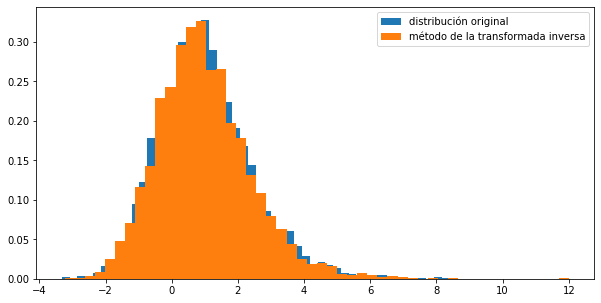

In [5]:
# Elegir la distribución
#st.exponnorm.
name_dist = 'exponnorm'
# Explorar la función de la función getattr
dist = getattr(st,name_dist )
# Parametros de la distribución
K = 1
# Cantidad de términos
N = 5000
# Diccionario de argumentos de la distribución
args = {'K':K, 'size': N}

# Generación de variable aleatorias de la distrubición elegida
x = dist.rvs(**args)

# Comparación de histogramas
# 1. Histograma distribución original
plt.figure(figsize=[10,5])
plt.hist(x, bins=50,density=True, label='distribución original');

# 2. Implementación del método de la transformada inversa usando función 'ppf'
U = np.random.rand(N)
f_inv = dist.ppf(U,args['K'])
plt.hist(f_inv, bins=50, density=True, label='método de la transformada inversa');
plt.legend()

## <font color ='red'> **Ejercicio 2** 
 1. Generación variable aleatoria continua

$$
h(x)=
\begin{cases}
0, & x<0 \\
x, & 0 \le x < 1 \\
2-x, & 1\le x \le 2 \\
0,& x>1
\end{cases}
$$

Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 100 muestras generadas con el método y compárela con el función $h(x)$ dada, esto con el fín de validar que el procedimiento fue realizado de manera correcta

### Método de la transformada inversa

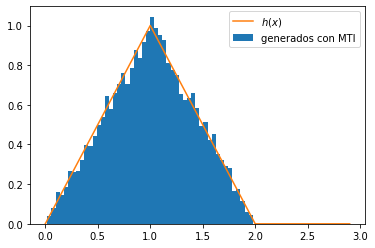

In [18]:
# Crear función acumulada
H= lambda x:0 if x < 0 else (x**2 / 2 if 0<= x < 1 else(2*x-x**2 / 2 -1 if 1<=x<=2 else 1))

# Graficar función acumulada
N = 10000
x=np.arange(0,3,0.1)
H_x=list(map(lambda x: H(x),x))
#plt.plot(x, H_x, label='$H(x)$')
# Crear función inversa
H_inv=lambda u: np.sqrt(2 * u) if 0<= u < 0.5 else 2 - np.sqrt(4-2*(u+1))

# Validar función inversa (gráfica)

# Vector de aleatorios uniformer
U= np.random.rand(N)
H_inv_u= list(map(lambda u: H_inv(u), U))

# Vector generado con MTI

# Graficar histograma aleatorios
plt.hist(H_inv_u, bins=50, density=True, label='generados con MTI');

# Función de densidad h(x)
h = lambda x: 0 if x < 0 else (x if 0 <= x < 1 else (2 - x if 1 <= x < 2 else 0))

density = list(map(lambda x: h(x), x))
# Graficar función de densidad h(x)
plt.plot(x, density, label='$h(x)$')
plt.legend();

### Método de aceptación y rechazo

4420

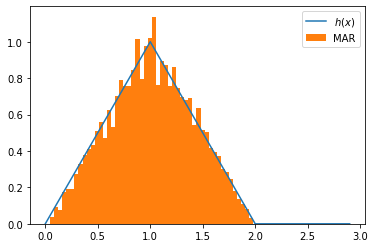

In [30]:
N = 9000

# Graficar densidad de probabilidad h(x)
h = lambda x: 0 if x < 0 else (x if 0 <= x < 1 else (2 - x if 1 <= x < 2 else 0))


density = list(map(lambda x: h(x), x))
# Graficar función de densidad h(x)
plt.plot(x, density, label='$h(x)$')

# Programar método de aceptación y rechazo
max_h=1

t= lambda x: max_h * np.ones(N)

R1= np.random.uniform(0,2,N)
R2=np.random.rand(N)

h_r1=[h(ri) for ri in R1]

condition= R2* max_h <= h_r1

# Graficar puntos aceptados
#[plt.plot(R1[i], R2[i]*max_h,'ob') if condition [i] else plt.plot(R1[i], R2[i]*max_h,'o') for i in range(N)];
# Almacenar números aceptados en una variable y graficar su histograma
x_rand=[R1[i] for i in range(N) if condition [i]];
plt.hist(x_rand, bins=50, density=True, label= 'MAR')
plt.legend();
len(x_rand)

## Ejercicio 2
Suponga que tiene la siguiente probability mass function 
$$
P(X=k) = 
\begin{cases} 
\frac{1}{3}\left( \frac{2}{3}\right)^{k-1}, & \text{si } k=1, 2, \cdots \\
0, & \text{otro caso}
\end{cases}
$$

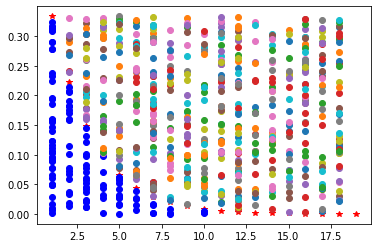

In [71]:
N = 700
# PMF p(x)
p = lambda k: (1 / 3) * (2 / 3) ** (k-1) 

# Gráfica de pmf
k = np.arange(1, 20)
plt.plot(k, p(k), 'r*')

# Método de aceptación rechazo discreto
max_p = p(1)
